# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.


$\mathrm{d}_w Q=\mathrm{d}_w\left[(y-X w)^T(y-X w)\right]=$
$\mathrm{d}_w\left[(y-X w)^T\right](y-X w)+(y-X w)^T \mathrm{~d}_w[(y-X w)]=$
$\mathrm{d}_w\left[(-X w)^T\right](y-X w)-(y-X w)^T X \mathrm{~d} w=$
$-\mathrm{d} w^T X^T(y-X w)-(y-X w)^T X \mathrm{~d} w=-2(y-X w)^T X \mathrm{~d} w$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/41257/run-report/73406306/


* **StochasticDescent**: https://contest.yandex.ru/contest/41257/run-report/73406483/


* **MomentumDescent**: https://contest.yandex.ru/contest/41257/run-report/73406811/


* **Adam**: https://contest.yandex.ru/contest/41257/run-report/73408424/


* **LinearRegression**: https://contest.yandex.ru/contest/41257/run-report/73413643/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [10]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

Посмотрим на распределение таргета и логарифма таргета:

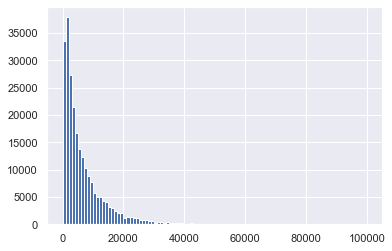

In [12]:
plt.hist(y.values, bins=100)
plt.show()

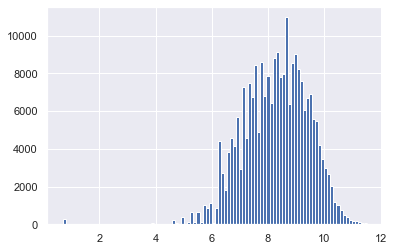

In [13]:
plt.hist(np.log1p(y.values), bins=100)
plt.show()

Рапределение логарифма таргета больше похоже на нормальное распределение, поэтому возьмём логарифм

In [14]:
y_old = y.copy()
y = np.log1p(y)

In [15]:
data.describe()


,powerPS,kilometer,autoAgeMonths,price,bias
count,241190.000000,241190.000000,241190.000000,241190.000000,241190.0
mean,131.271628,123766.677723,144.768676,6887.741892,1.0
std,60.622613,39825.955933,73.092598,8024.451993,0.0
min,51.000000,5000.000000,1.000000,1.000000,1.0
25%,90.000000,100000.000000,92.000000,1750.000000,1.0
50%,120.000000,150000.000000,140.000000,4100.000000,1.0
75%,160.000000,150000.000000,192.000000,8999.000000,1.0
max,589.000000,150000.000000,600.000000,99999.000000,1.0


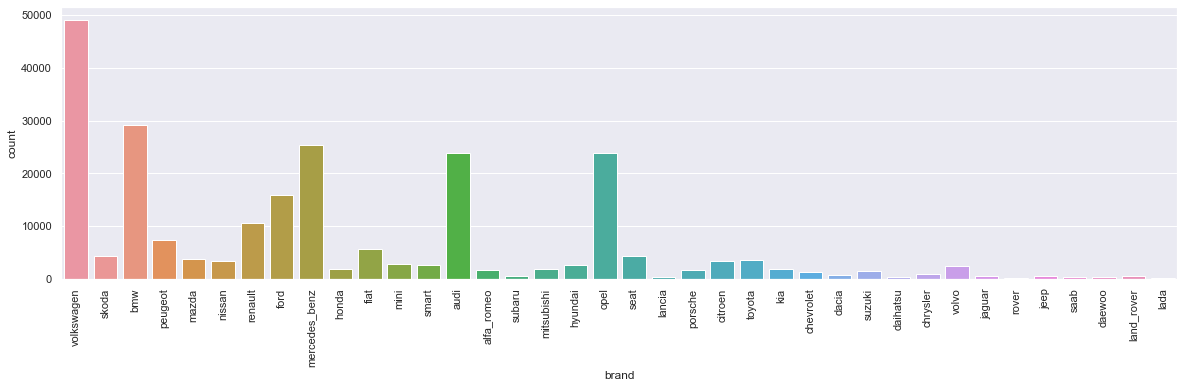

In [16]:
fig, axs = plt.subplots(figsize=(20, 5))
fig = sns.countplot(x=data['brand'])
plt.xticks(rotation=90)
plt.show()

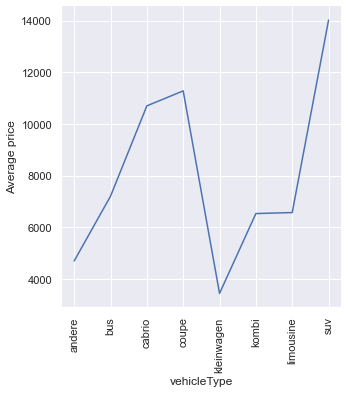

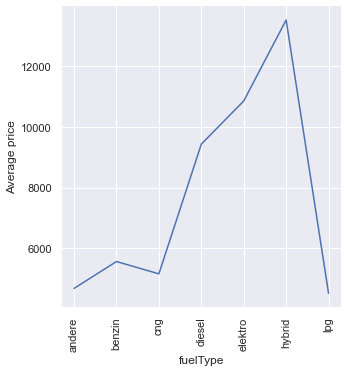

In [17]:
data1 = data.copy()
data1['log_price'] = y # уже закинули в таргет логарифм

features_to_plot = ['vehicleType', 'fuelType']

for i, feature in enumerate(features_to_plot):
    f = sns.relplot(data=data1.groupby([feature]).mean(), x=feature, y='price', kind='line')
    f.set(xlabel=feature, ylabel='Average price')
    plt.xticks(rotation=90)

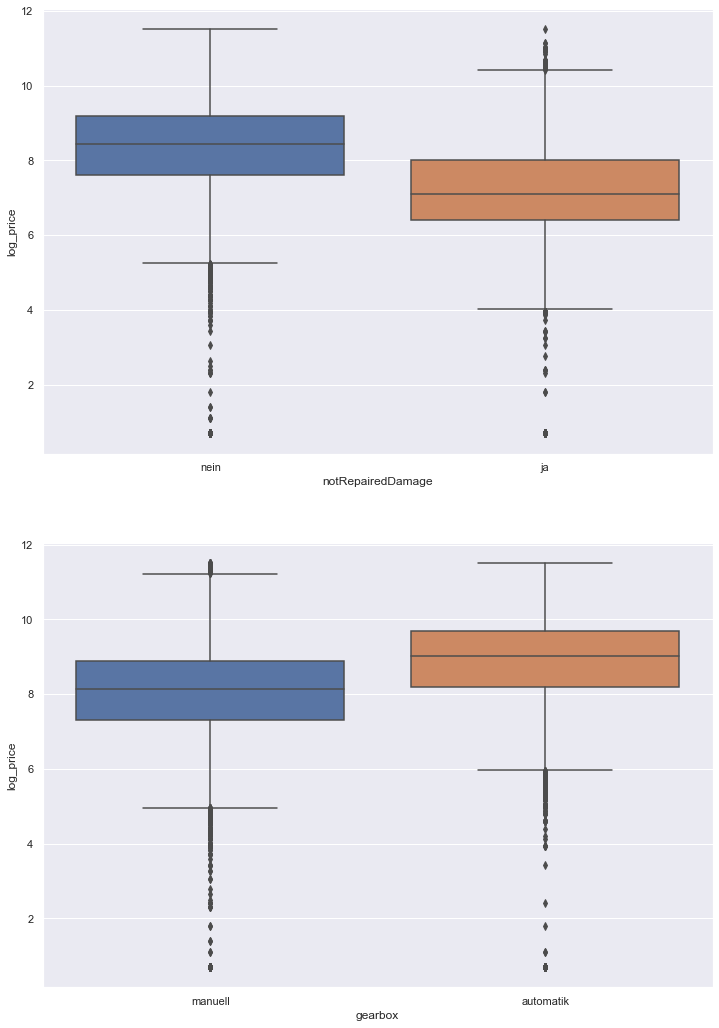

In [18]:
fig, axs = plt.subplots(2, figsize = (12, 18))    
features_to_boxplot = ['notRepairedDamage', 'gearbox']
for i, feature in enumerate(features_to_boxplot):
    sns.boxplot(ax=axs[i], data=data1, x=feature, y='log_price')
    
plt.show()

Выводы:
1) ожидаемо машины без неустранённых неисправностей дороже, чем с ними 

2) машины с АКПП в среднем дороже, чем с механической

3) машины с гибридным видом топлива и электрокары в среднем дороже остальных

4) ожидаемо спорткары (SUV) в среднем дороже, чем все остальные типы автомобилей

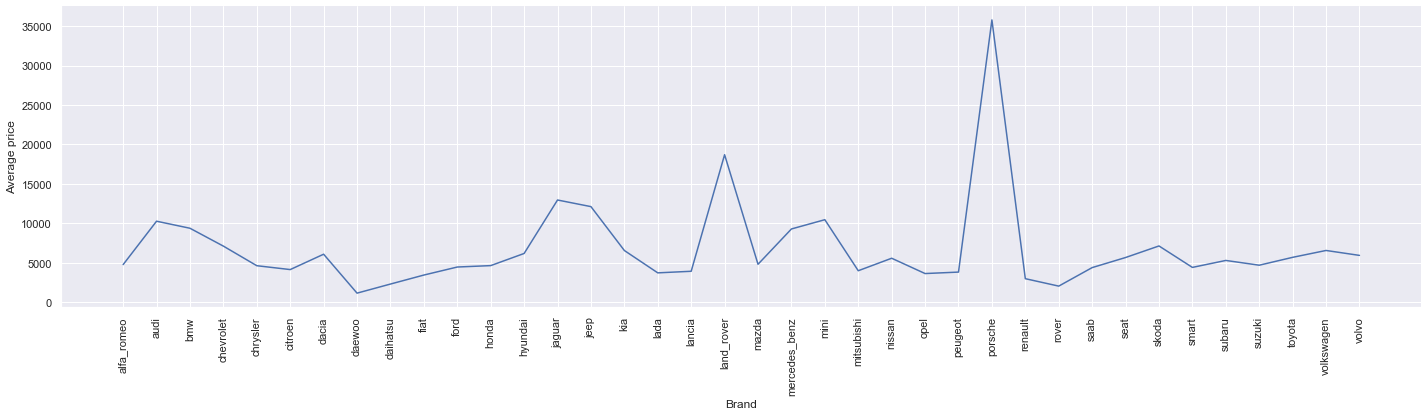

In [19]:
fig = sns.relplot(data=data1.groupby(['brand']).mean(), x='brand', y='price', kind='line', height=5, aspect=4)
fig.set(xlabel='Brand', ylabel='Average price')
plt.xticks(rotation=90)
plt.show()

Из дорогих марок можем отметить Porsche (сильно выделяется на фоне остальных), Land Rover, Jaguar, Jeep -- либо спорткары, либо внедорожники

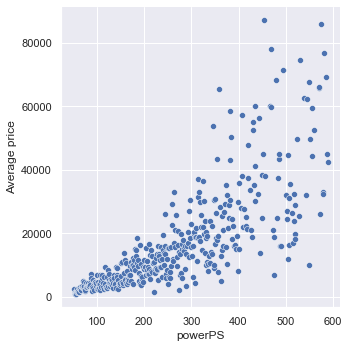

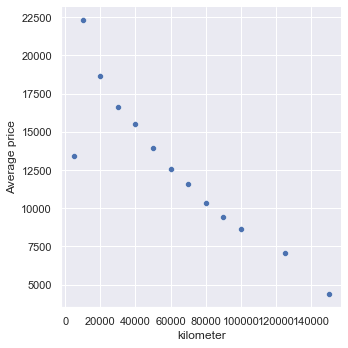

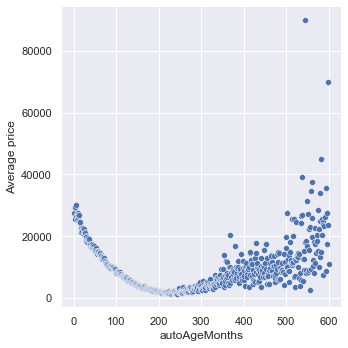

In [20]:
features_to_relplot = ['powerPS', 'kilometer', 'autoAgeMonths']

for i, feature in enumerate(features_to_relplot):
    fig1 = sns.relplot(data=data1.groupby(feature).mean(), x=feature, y='price')
    fig1.set(xlabel=feature, ylabel='Average price')
plt.show()

Ещё выводы:

5) очевидно, чем больше лошадиных сил, тем дороже в среднем стоит машина

6) для совсем новых машин зависимости нет, но далее машины с большим пробегом стоят в среднем меньше, чем машины с меньшим пробегом

7) для машин возрастом до 25 в принципе ясна зависимость цены от возраста: чем старше машина, тем в среднем меньше она стоит, после 25 лет (300 месяцев) машины стоят не очень дорого, но по разному (то есть важно смотреть на бренд и модель) за редким исключением – есть машины возрастом от 40 до 50 лет, которые стоят очень дорого – старые спорткары или что-то ещё

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

192952 24119 24119


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [22]:
y_train = y_train.to_numpy() # считаем, что на вход приходит ndarray, а сейчас y_train это Series
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [23]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(192952, 310) (24119, 310) (192952,) (24119,)


In [24]:
from sklearn.metrics import r2_score

max_iter = 300
tolerance = 0

dimension = X_train.shape[1]

descent_config = {
    'descent_name': 'to_be_replaced',
    'kwargs': {
        'dimension': dimension,
        'lambda_': 'to_be_replaced'
    }
}


losses = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'about to train regression using {descent_name} descent...')
    descent_config['descent_name'] = descent_name
    lambdas = np.logspace(-5, 1, 30)
    losses[descent_name] = []
    best_loss = None
    best_param = None
    for i, la in enumerate(lambdas):
#         print(f'current lambda: {la}')
        descent_config['kwargs']['lambda_'] = la
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
        )
        regression.fit(X_train, y_train)
        train_loss = regression.calc_loss(X_train, y_train)
        pred = regression.predict(X_val)
        val_loss = regression.calc_loss(X_val, y_val)
        test_loss = regression.calc_loss(X_test, y_test)
        metric = r2_score(y_val, pred)
        query = {}
        query['lambda'] = la
        query['train_loss'] = train_loss
        query['val_loss'] = val_loss
        query['test_loss'] = test_loss
        query['metric'] = metric
        losses[descent_name].append(query)
#         if i % 5 == 0:
#         print(query)
        if best_loss is None:
            best_loss = test_loss
        else:
            if best_loss > test_loss:
                best_loss = test_loss
                best_param = la
    print(f'Best param for {descent_name} is {best_param}')
        

about to train regression using full descent...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/h1de0us/uni/machine-learning/ml-homework/hw3/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.sum((pred - y) ** 2) / y.shape[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


Best param for full is 1.4873521072935119
about to train regression using stochastic descent...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/h1de0us/uni/machine-learning/ml-homework/hw3/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.sum((pred - y) ** 2) / y.shape[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


Best param for stochastic is 0.5736152510448681
about to train regression using momentum descent...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/h1de0us/uni/machine-learning/ml-homework/hw3/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.sum((pred - y) ** 2) / y.shape[0]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_regression.py:603: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0,


Best param for momentum is 1.4873521072935119
about to train regression using adam descent...
Best param for adam is 3.856620421163472


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

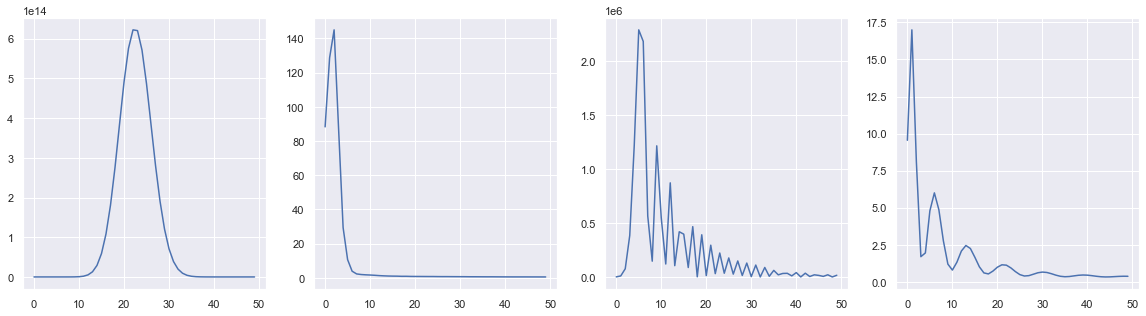

In [25]:
best_params = {}
best_params['full']['lambda'] = 1.4873521072935119
best_params['stochastic']['lambda'] = 0.5736152510448681
best_params['momentum']['lambda'] = 1.4873521072935119
best_params['adam']['lambda'] = 1.4873521072935119

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension
    }
}

max_iter = 50

train_losses = {}
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    train_losses[descent_name] = []
    best_lambda = best_params[descent_name]
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = best_lambda
    descent = get_descent(descent_config)
    for it in range(max_iter):
        diff = descent.step(X_train, y_train)
        predictions = descent.predict(X_val)
        loss = descent.calc_loss(X_val, y_val)
        train_losses[descent_name].append(loss)
    axs[i].plot(train_losses[descent_name])
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

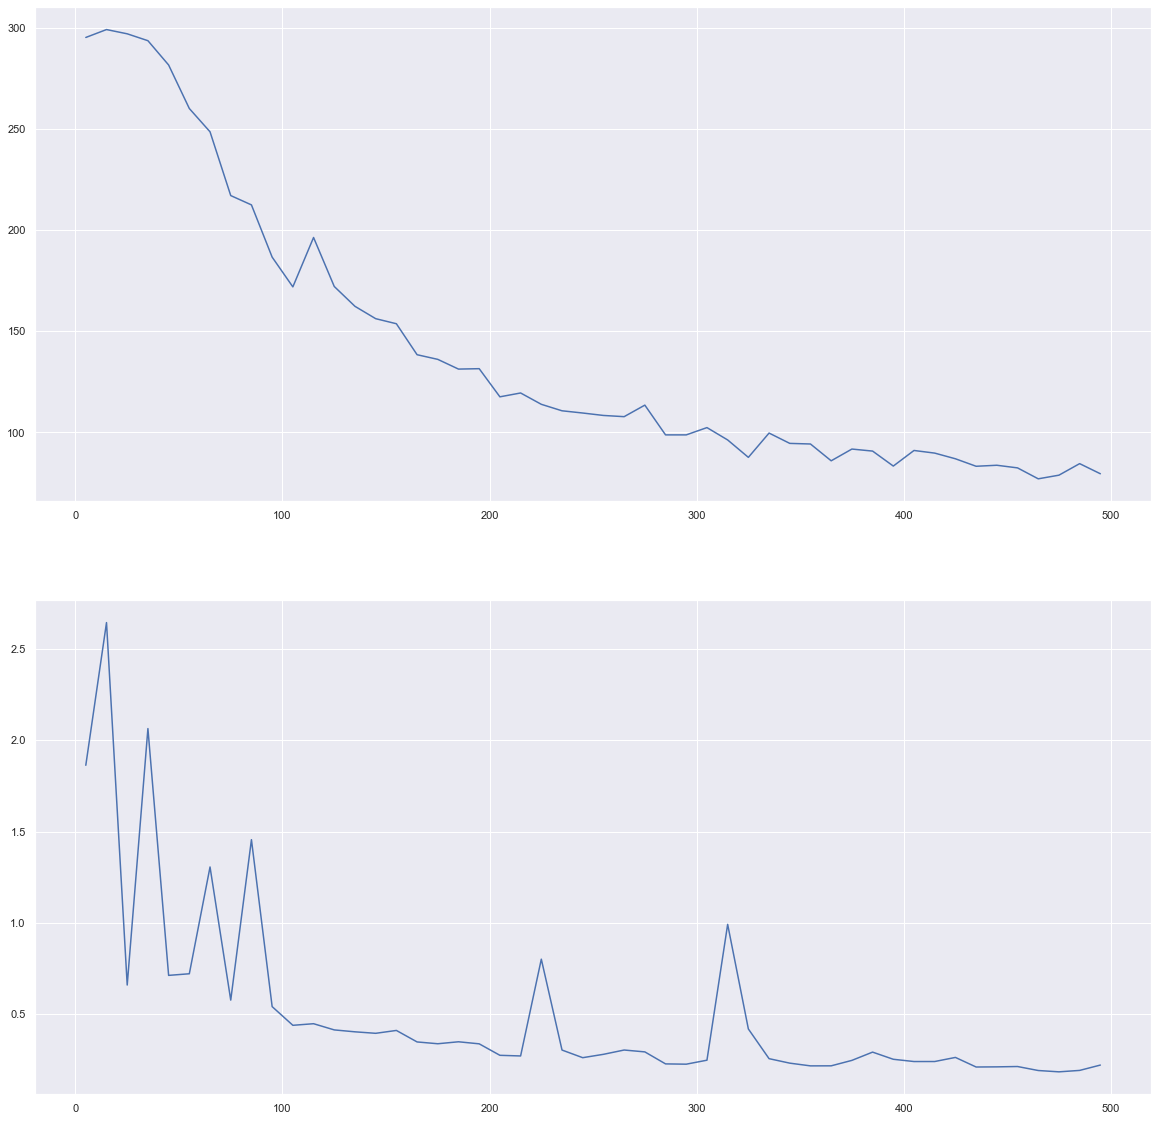

In [65]:
import time

batch_sizes = np.arange(5, 500, 10)

k = 10

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'lambda_': best_params['stochastic']['lambda'],
        'dimension': dimension,
        'batch_size': 'to_be_replaced'
    }
}

params_by_batch_size = {}
convergence = []
times = []
max_iter = 300
tolerance = 1e-4
for batch_size in batch_sizes:
    params_by_batch_size[batch_size] = {}
    last_iteration = 0
    total_time = 0
    descent_config['kwargs']['batch_size'] = batch_size
    for iteration in range(k):
        descent = get_descent(descent_config)
        start_time = time.time()
        for it in range(max_iter):
            delta = descent.step(X_train, y_train)
            if np.isnan(delta).any():
                break
            if np.linalg.norm(delta) ** 2 <= tolerance:
                break
        stop_time = time.time()
        delta_time = stop_time - start_time
        total_time += delta_time
        last_iteration += it
    params_by_batch_size[batch_size]['convergence'] = last_iteration / k
    params_by_batch_size[batch_size]['time'] = total_time / k
    convergence.append(last_iteration / k)
    times.append(total_time / k)
    
fig, axs = plt.subplots(2, figsize=(20, 20))
axs[0].plot(batch_sizes, convergence)
axs[1].plot(batch_sizes, times)
plt.show()

На первом графике – зависимость среднего количества итераций до сходимости от размера батча (пришлось поставить tolerance=1e-4, при меньших значениях все сходились за max_iter итераций), на втором – зависимость среднего времени выполнения от размера батча

Видим, что чем больше размер батча, тем меньше итераций нужно для сходимости и тем меньше (за некоторыми исключениями) время выполнения

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/41257/run-report/73639052/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [28]:
descent_config = {
    'descent_name': 'to_be_replaced',
    'regularized': True,
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension,
        'mu': 'to_be_replaced'
    }
}

max_iter = 50

losses_l2 = {}
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    print(f'about to train regression using {descent_name} descent...')
    descent_config['descent_name'] = descent_name
    lambdas = np.logspace(-5, 1, 30)
    mus = np.logspace(-5, 1, 20)
    losses_l2[descent_name] = []
    best_loss = None
    best_lambda = None
    best_mu = None
    for la in lambdas:
        for mu in mus:
            descent_config['descent_name'] = descent_name
            descent_config['kwargs']['lambda_'] = la
            descent_config['kwargs']['mu'] = mu
            descent = get_descent(descent_config)
            for it in range(max_iter):
                diff = descent.step(X_train, y_train)
                predictions = descent.predict(X_val)
                loss = descent.calc_loss(X_val, y_val)
            train_loss = descent.calc_loss(X_train, y_train)
            val_loss = descent.calc_loss(X_val, y_val)
            test_loss = descent.calc_loss(X_test, y_test)
            query = {}
            query['lambda'] = la
            query['mu'] = mu
            query['train_loss'] = train_loss
            query['val_loss'] = val_loss
            query['test_loss'] = test_loss
            query['metric'] = metric
            losses_l2[descent_name].append(query)
            if best_loss is None:
                best_loss = test_loss
            else:
                if best_loss > test_loss:
                    best_loss = test_loss
                    best_lambda = la
                    best_mu = mu
    print(f'Best param for {descent_name} are lambda={best_lambda} and mu={best_mu}')
        

about to train regression using full descent...
Best param for full are lambda=1.4873521072935119 and mu=0.001623776739188721
about to train regression using stochastic descent...
Best param for stochastic are lambda=0.5736152510448681 and mu=0.0007847599703514606
about to train regression using momentum descent...
Best param for momentum are lambda=0.5736152510448681 and mu=0.000379269019073225
about to train regression using adam descent...
Best param for adam are lambda=1.4873521072935119 and mu=8.858667904100833e-05


Лучшие лямбды для градиентов без регуляризации:

Best param for full is 1.4873521072935119

Best param for stochastic is 0.5736152510448681

Best param for momentum is 1.4873521072935119

Best param for adam is 1.4873521072935119

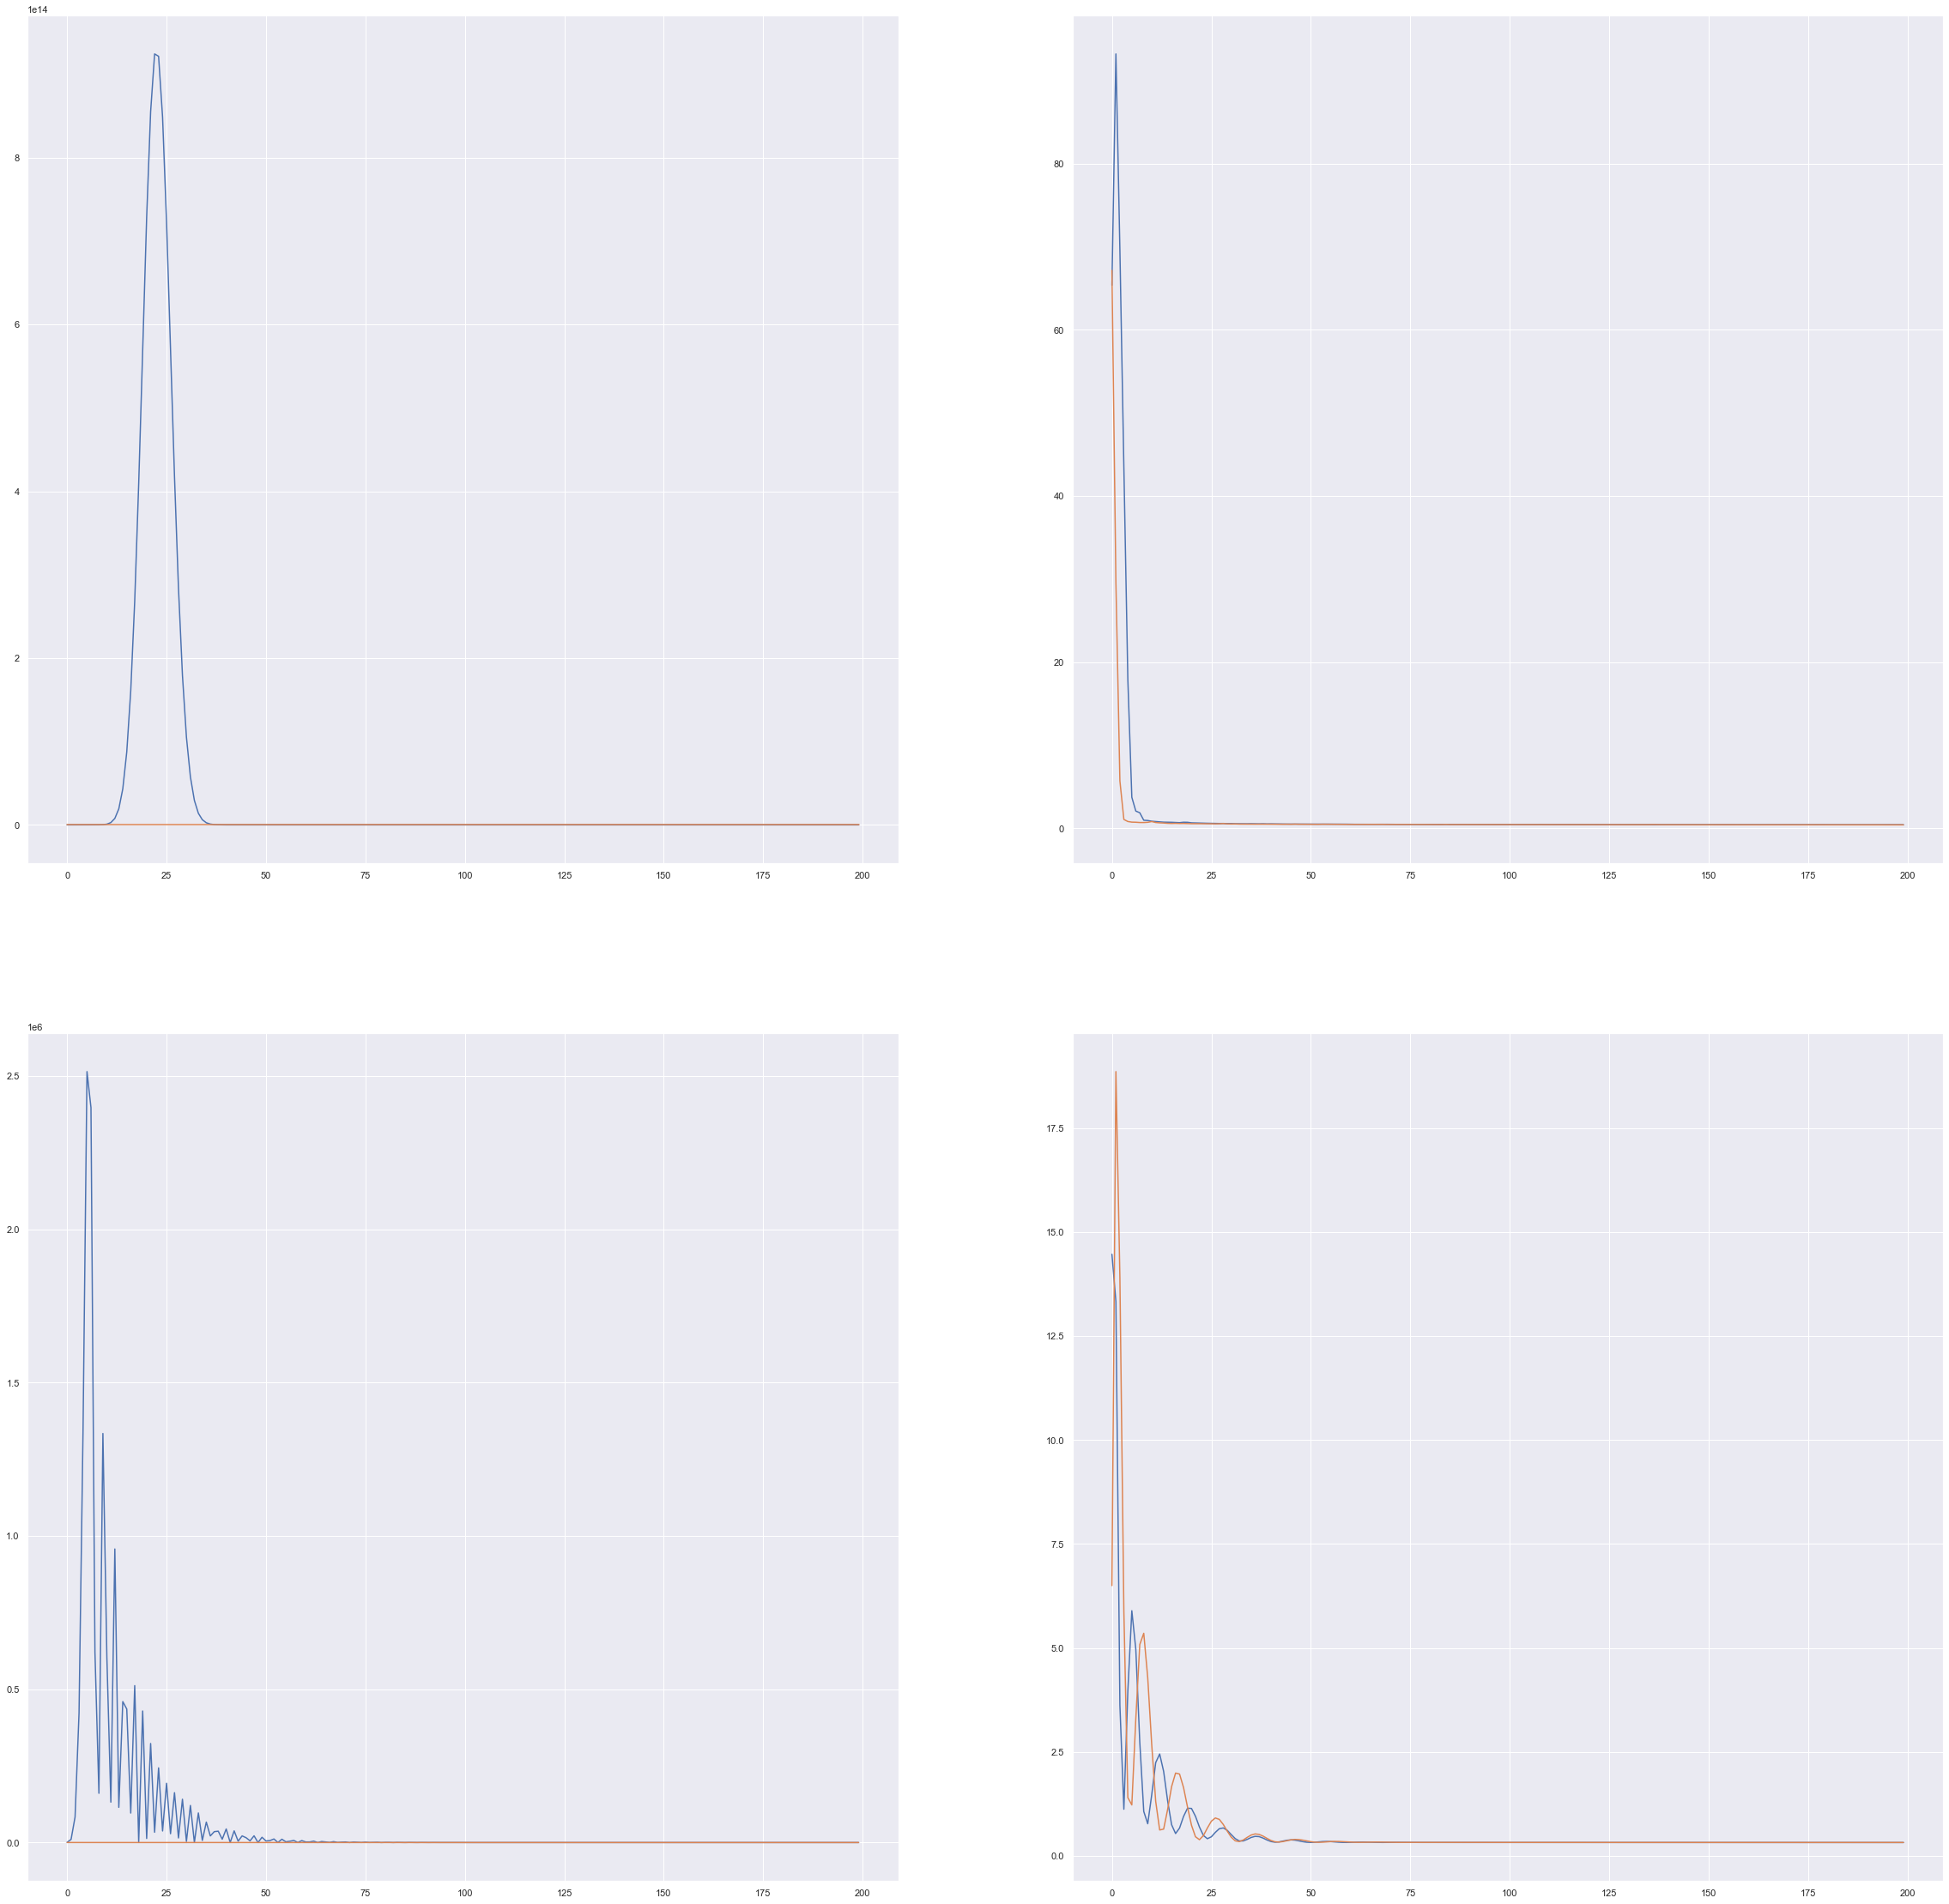

In [29]:
best_params = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_params[descent_name] = {}
best_params['full']['lambda'] = 1.4873521072935119
best_params['stochastic']['lambda'] = 0.5736152510448681
best_params['momentum']['lambda'] = 1.4873521072935119
best_params['adam']['lambda'] = 1.4873521072935119

best_params_l2 = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    best_params_l2[descent_name] = {}
    best_params_l2[descent_name]['lambda'] = 0
    best_params_l2[descent_name]['mu'] = 0
    
best_params_l2['full']['lambda'] = 1.4873521072935119
best_params_l2['full']['mu'] = 0.0007847599703514606

best_params_l2['stochastic']['lambda'] = 0.5736152510448681
best_params_l2['stochastic']['mu'] = 0.01438449888287663

best_params_l2['momentum']['lambda'] = 0.5736152510448681
best_params_l2['momentum']['mu'] = 0.001623776739188721

best_params_l2['adam']['lambda'] = 1.4873521072935119
best_params_l2['adam']['mu'] = 4.281332398719396e-05


descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension
    }
}

descent_config_l2 = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'mu': 'to_be_replaced',
        'dimension': dimension
    }
}

max_iter = 200

train_losses = {}
train_losses_l2 = {}
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    train_losses[descent_name] = []
    descent_config['descent_name'] = descent_name
    descent_config['kwargs']['lambda_'] = best_params[descent_name]['lambda']
    descent = get_descent(descent_config)
    for it in range(max_iter):
        diff = descent.step(X_train, y_train)
        predictions = descent.predict(X_val)
        loss = descent.calc_loss(X_val, y_val)
        train_losses[descent_name].append(loss)
    axs[i // 2, i % 2].plot(train_losses[descent_name])
    
    train_losses_l2[descent_name] = []
    descent_config_l2['descent_name'] = descent_name
    descent_config_l2['regularized'] = True
    descent_config_l2['kwargs']['lambda_'] = best_params_l2[descent_name]['lambda']
    descent_config_l2['kwargs']['mu'] = best_params_l2[descent_name]['mu']
    descent2 = get_descent(descent_config_l2)
    for it in range(max_iter):
        diff = descent2.step(X_train, y_train)
        predictions = descent2.predict(X_val)
        loss = descent2.calc_loss(X_val, y_val)
        train_losses_l2[descent_name].append(loss)
    axs[i // 2, i % 2].plot(train_losses_l2[descent_name])

    
plt.show()

Беды с масштабом, нарисуем на разных графиках

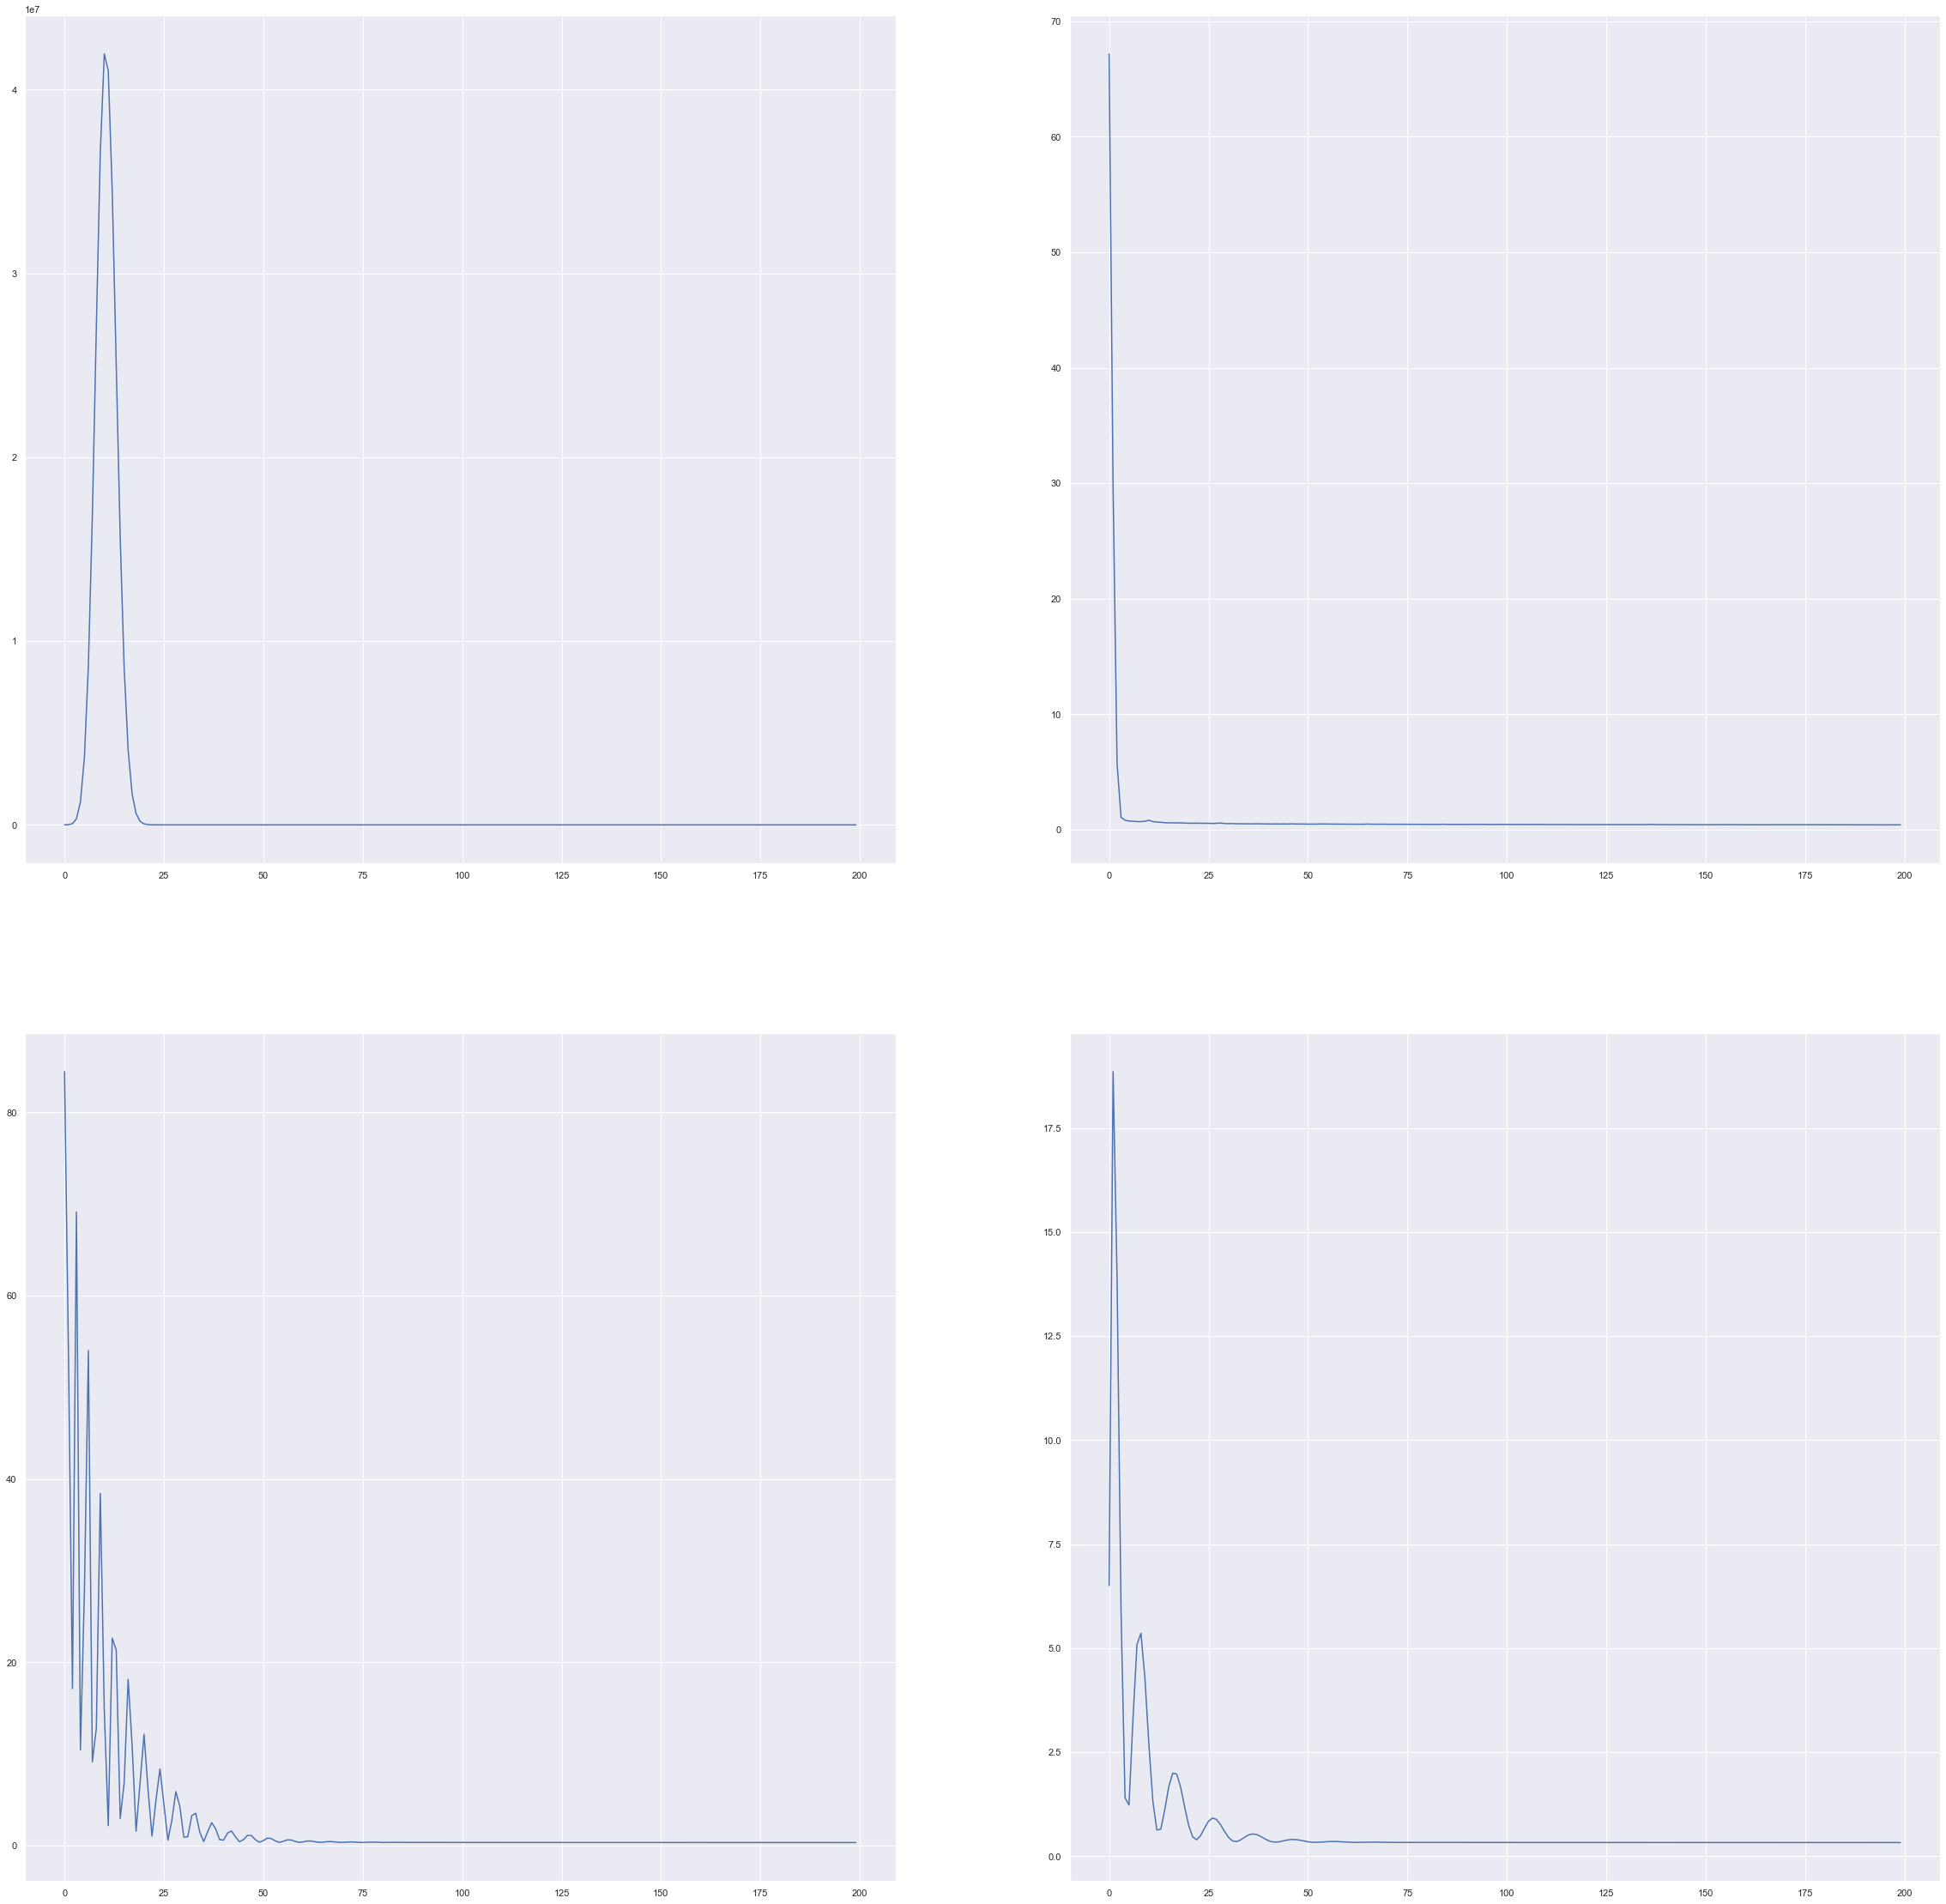

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(40, 40))
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    axs[i // 2, i % 2].plot(train_losses_l2[descent_name])

In [31]:
print('Лоссы без регуляризации')
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    print(f'test loss for {descent_name} descent is {train_losses[descent_name][-1]}')
    
print('Лоссы с регуляризацией')
for i, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
    print(f'test loss for {descent_name} descent is {train_losses_l2[descent_name][-1]}')


Лоссы без регуляризации
test loss for full descent is 0.3773529031989253
test loss for stochastic descent is 0.43819549969277727
test loss for momentum descent is 0.3366662152890356
test loss for adam descent is 0.3252130980984589
Лоссы с регуляризацией
test loss for full descent is 0.3823348289397087
test loss for stochastic descent is 0.426712737790054
test loss for momentum descent is 0.34978926966075513
test loss for adam descent is 0.3264059309401511


## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
\frac{dL}{dw} = \frac{dl}{dg} \cdot \frac{dg}{dw} = \frac1n \sum \frac{1}{cosh(w^T x_i - y_i)} \cdot \frac{\exp(w^T x_i - y_i) - \exp(-w^T x_i + y_i) }{2} \cdot x_i = \frac{1}{n} \sum \frac{2}{\exp(w^T x_i - y_i) + \exp(-w^T x_i + y_i)} \cdot \frac{\exp(w^T x_i - y_i) - \exp(-w^T x_i + y_i) }{2} \cdot x_i = \frac1n \sum \tanh(w^t x_i - y_i) \cdot x_i = \frac1n \tanh(w^T \cdot X^T- y^T) \cdot X
$$

Тут транспонировали X и y,  потому что мы хотим умножать веса на признаки одного объекта, то есть признаки одного объекта должны быть записаны в столбец, а y мы вычитаем, поэтому тоже надо транспонировать

Градиент нам надо умножать на столбец dw – полученное выражение надо ещё транспонировать: $$ \frac1n X^T \tanh(Xw - y) $$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [75]:
from descents import LossFunction

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension,
        'loss_function': LossFunction.LogCosh
    }
}


max_iter = 200
losses_logcosh = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'about to train regression using {descent_name} descent and logcosh loss')
    descent_config['descent_name'] = descent_name
    lambdas = np.logspace(-5, 1, 30)
    losses_logcosh[descent_name] = []
    best_loss = None
    best_param = None
    best_metric = None
    for i, la in enumerate(lambdas):
        descent_config['kwargs']['lambda_'] = la
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
        )
        regression.fit(X_train, y_train)
        train_loss = regression.calc_loss(X_train, y_train)
        pred = regression.predict(X_val)
        val_loss = regression.calc_loss(X_val, y_val)
        test_loss = regression.calc_loss(X_test, y_test)
        metric = r2_score(y_val, pred)
        query = {}
        query['lambda'] = la
        query['train_loss'] = train_loss
        query['val_loss'] = val_loss
        query['test_loss'] = test_loss
        query['metric'] = metric
        losses_logcosh[descent_name].append(query)
        if best_loss is None:
            best_loss = test_loss
        else:
            if best_loss > test_loss:
                best_loss = test_loss
                best_param = la
                best_metric = metric
    print(f'Best lambda for {descent_name} with logcosh is {best_param}, test loss is {best_loss}, metric={best_metric}')

about to train regression using full descent and logcosh loss
Best lambda for full with logcosh is 6.2101694189156165, test loss is 0.13512159323162376, metric=0.6980689777321006
about to train regression using stochastic descent and logcosh loss
Best lambda for stochastic with logcosh is 3.856620421163472, test loss is 0.13251141801852687, metric=0.7051658452343179
about to train regression using momentum descent and logcosh loss
Best lambda for momentum with logcosh is 6.2101694189156165, test loss is 0.1133933641840618, metric=0.7395755602420708
about to train regression using adam descent and logcosh loss
Best lambda for adam with logcosh is 6.2101694189156165, test loss is 0.10974719879410906, metric=0.750662336995999


In [39]:
# losses -- инфа по обучению моделей без регуляризации, losses_l2 -- инфа по обучению с регуляризацией
# эта клеточка спеицально чтобы повыводить лоссы и значение метрики, а то я раньше не выводила

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    for query in losses[descent_name]:
        if query['lambda'] == best_params[descent_name]['lambda']:
            print(f'Data for {descent_name} descent: \n\ttrain_loss={query["train_loss"]}, \n\tval_loss={query["val_loss"]}, \n\ttest_loss={query["test_loss"]}, \n\tmetric={query["metric"]}')
            
    for query in losses_l2[descent_name]:
        if query['lambda'] == best_params_l2[descent_name]['lambda'] and \
            query['mu'] == best_params_l2[descent_name]['mu']:
            print(f'Data for {descent_name} descent with regularization: \n\ttrain_loss={query["train_loss"]}, \n\tval_loss={query["val_loss"]}, \n\ttest_loss={query["test_loss"]}, \n\tmetric={query["metric"]}')

Data for full descent: 
	train_loss=0.37663404437541154, 
	val_loss=0.3762624265336316, 
	test_loss=0.3568040381343593, 
	metric=0.7194955174516858
Data for full descent with regularization: 
	train_loss=0.42168422310229237, 
	val_loss=0.42370204074883744, 
	test_loss=0.4040098128004236, 
	metric=0.7573769471678937
Data for stochastic descent: 
	train_loss=0.4146144229726029, 
	val_loss=0.4094402314135949, 
	test_loss=0.3927775159638495, 
	metric=0.6947613895301694
Data for stochastic descent with regularization: 
	train_loss=0.521380849789536, 
	val_loss=0.5183667228571844, 
	test_loss=0.5025462978934627, 
	metric=0.7573769471678937
Data for momentum descent: 
	train_loss=0.33704536208465763, 
	val_loss=0.3335564467018562, 
	test_loss=0.31663475168578625, 
	metric=0.7513329211616206
Data for momentum descent with regularization: 
	train_loss=0.3834901658363205, 
	val_loss=0.3813804548814204, 
	test_loss=0.3633176335868659, 
	metric=0.7573769471678937
Data for adam descent: 
	train_los

Если смотреть на метрику, градиентные спуски с регуляризацией победили во всех случаях, кроме Adam

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

деанона не будет

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [57]:
from sklearn.metrics import r2_score

max_iter = 300
tolerance = 1e-4

dimension = X_train.shape[1]

descent_config = {
    'descent_name': 'adamax',
    'kwargs': {
        'dimension': dimension,
        'lambda_': 'to_be_replaced'
    }
}

descent_name = 'adamax'
lambdas = np.logspace(-5, 1, 30)
losses[descent_name] = []
best_loss = None
best_param = None
for i, la in enumerate(lambdas):
    descent_config['kwargs']['lambda_'] = la
    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter,
    )
    regression.fit(X_train, y_train)
    train_loss = regression.calc_loss(X_train, y_train)
    pred = regression.predict(X_val)
    val_loss = regression.calc_loss(X_val, y_val)
    test_loss = regression.calc_loss(X_test, y_test)
    metric = r2_score(y_val, pred)
    query = {}
    query['lambda'] = la
    query['train_loss'] = train_loss
    query['val_loss'] = val_loss
    query['test_loss'] = test_loss
    query['metric'] = metric
    losses[descent_name].append(query)
    if best_loss is None:
        best_loss = test_loss
    else:
        if best_loss > test_loss:
            best_loss = test_loss
            best_param = la
print(f'Best param for {descent_name} is {best_param}')
        

Best param for adamax is 2.395026619987486


In [62]:
best_params['adamax'] = {}
best_params['adamax']['lambda'] = 2.395026619987486

for query in losses['adamax']:
    if query['lambda'] == best_params['adamax']['lambda']:
        print(f'Data for adamax: \n\tbest lambda={query["lambda"]}, \n\ttrain_loss={query["train_loss"]}, \n\tval_loss={query["val_loss"]}, \n\ttest_loss={query["test_loss"]}, \n\tmetric={query["metric"]}')

Data for adamax: 
	best lambda=2.395026619987486, 
	train_loss=0.33383065333042555, 
	val_loss=0.329725128949489, 
	test_loss=0.31387085076998633, 
	metric=0.7541891771356937


### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

MAE можно разбить на кусочную функцию (возвращать y_pred - y_true в случае, если y_pred > y_true и y_true - y_pred в случае, когда y_pred < y_true), тогда в первом случае производная равна 1, во втором – -1, при равенстве y_pred и y_true производная не определена (ну это эквивалентно просто sgn(y_pred - y_true))

Huber loss:

$L_\delta(y, f(x))= \begin{cases}\frac{1}{2}(y-f(x))^2 & \text { for }|y-f(x)| \leq \delta \\ \delta \cdot\left(|y-f(x)|-\frac{1}{2} \delta\right), & \text { otherwise }\end{cases}$

f(x) в нашем случае – это Xw, поэтому градиент - $x^T.dot(sgn(y - f(x))$

Градиент:
$\nabla_\theta L_\delta(y, f(x))=\frac{1}{n} \sum_{i=1}^n \begin{cases}-\left(y_i-f(x)\right) & \left|y_i-f(x)\right| \leq \delta \\ -\delta \cdot \operatorname{sign}\left(y_i-f(x)\right) & \text { otherwise }\end{cases}$

f(x) в нашем случае – это Xw, поэтому градиент - $x^T.dot($то что в фигурных скобках $)$

Чтобы выбрать дельту для Huber Loss, последуем [советам умных людей](https://stats.stackexchange.com/questions/465937/how-to-choose-delta-parameter-in-huber-loss-function):
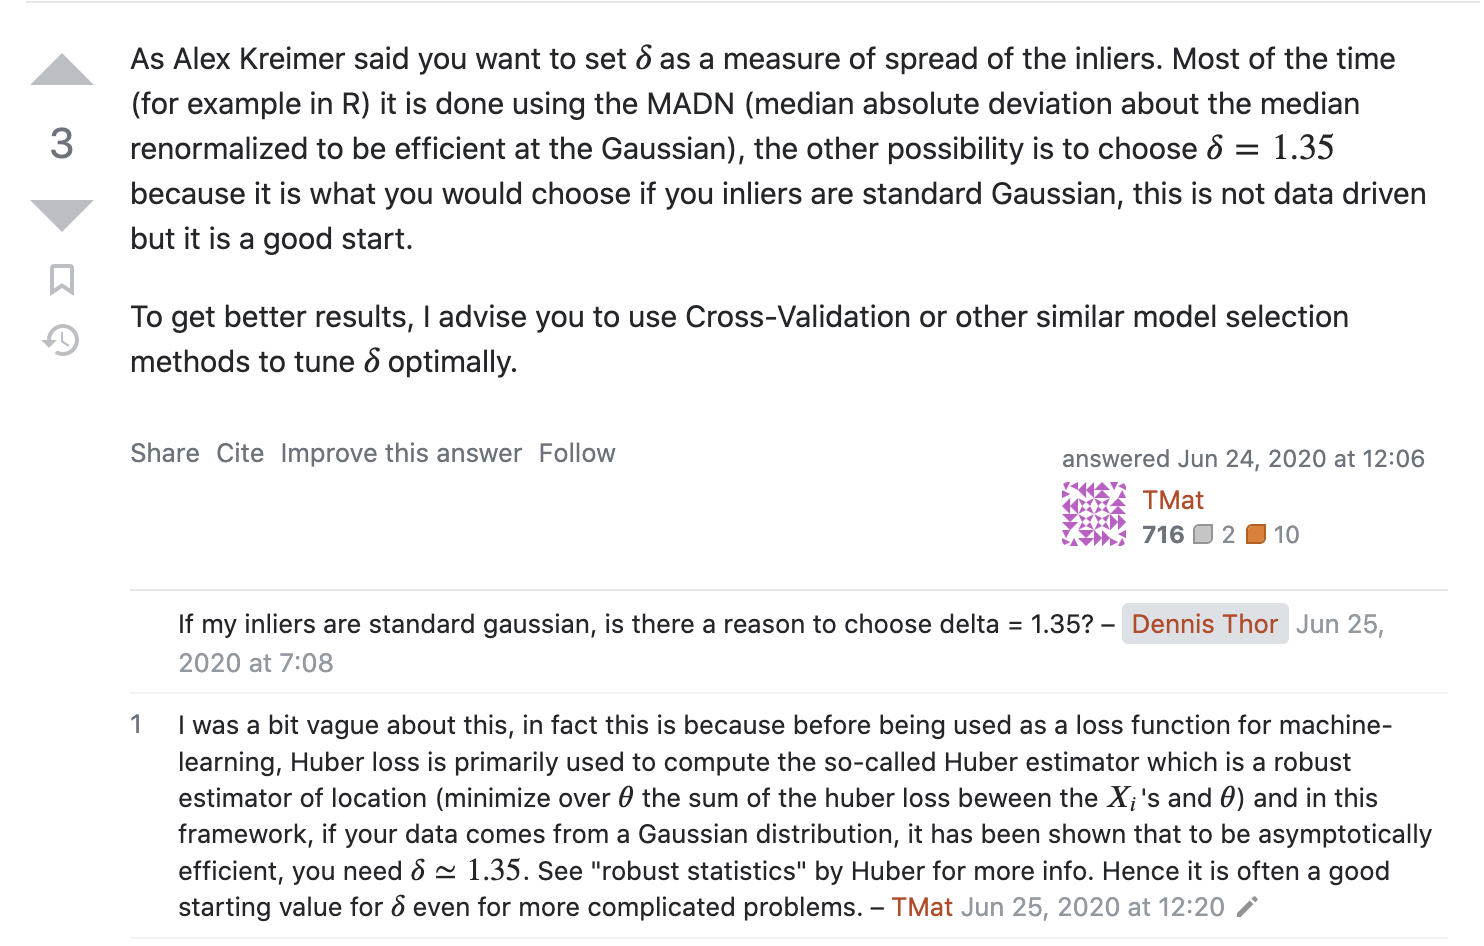


Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [80]:
from descents import LossFunction

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension,
        'loss_function': LossFunction.MAE
    }
}


max_iter = 200
losses_MAE = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'about to train regression using {descent_name} descent and MAE loss')
    descent_config['descent_name'] = descent_name
    lambdas = np.logspace(-5, 1, 30)
    losses_MAE[descent_name] = []
    best_loss = None
    best_param = None
    best_metric = None
    for i, la in enumerate(lambdas):
        descent_config['kwargs']['lambda_'] = la
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
        )
        regression.fit(X_train, y_train)
        train_loss = regression.calc_loss(X_train, y_train)
        pred = regression.predict(X_val)
        val_loss = regression.calc_loss(X_val, y_val)
        test_loss = regression.calc_loss(X_test, y_test)
        metric = r2_score(y_val, pred)
        query = {}
        query['lambda'] = la
        query['train_loss'] = train_loss
        query['val_loss'] = val_loss
        query['test_loss'] = test_loss
        query['metric'] = metric
        losses_MAE[descent_name].append(query)
        if best_loss is None:
            best_loss = test_loss
        else:
            if best_loss > test_loss:
                best_loss = test_loss
                best_param = la
                best_metric = metric
    print(f'Best lambda for {descent_name} with MAE is {best_param}, test loss is {best_loss}, metric={best_metric}')

about to train regression using full descent and MAE loss
Best lambda for full with MAE is 3.856620421163472, test loss is 0.40541934908638244, metric=0.6814192474742
about to train regression using stochastic descent and MAE loss
Best lambda for stochastic with MAE is 2.395026619987486, test loss is 0.38561157434393484, metric=0.6903246104405567
about to train regression using momentum descent and MAE loss
Best lambda for momentum with MAE is 3.856620421163472, test loss is 0.3447171057495986, metric=0.7158245872991801
about to train regression using adam descent and MAE loss
Best lambda for adam with MAE is 6.2101694189156165, test loss is 0.3398476412968803, metric=0.729338564010777


MAE оказалась хуже, чем MSE и LogCosh 

In [81]:
from descents import LossFunction

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'lambda_': 'to_be_replaced',
        'dimension': dimension,
        'loss_function': LossFunction.Huber
    }
}


max_iter = 200
losses_huber = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'about to train regression using {descent_name} descent and huber loss')
    descent_config['descent_name'] = descent_name
    lambdas = np.logspace(-5, 1, 30)
    losses_huber[descent_name] = []
    best_loss = None
    best_param = None
    best_metric = None
    for i, la in enumerate(lambdas):
        descent_config['kwargs']['lambda_'] = la
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
        )
        regression.fit(X_train, y_train)
        train_loss = regression.calc_loss(X_train, y_train)
        pred = regression.predict(X_val)
        val_loss = regression.calc_loss(X_val, y_val)
        test_loss = regression.calc_loss(X_test, y_test)
        metric = r2_score(y_val, pred)
        query = {}
        query['lambda'] = la
        query['train_loss'] = train_loss
        query['val_loss'] = val_loss
        query['test_loss'] = test_loss
        query['metric'] = metric
        losses_huber[descent_name].append(query)
        if best_loss is None:
            best_loss = test_loss
        else:
            if best_loss > test_loss:
                best_loss = test_loss
                best_param = la
                best_metric = metric
    print(f'Best lambda for {descent_name} with huber loss is {best_param}, test loss is {best_loss}, metric={best_metric}')

about to train regression using full descent and huber loss
Best lambda for full with huber loss is 3.856620421163472, test loss is 0.6054548519288934, metric=0.5773108361043389
about to train regression using stochastic descent and huber loss
Best lambda for stochastic with huber loss is 2.395026619987486, test loss is 0.8826031470476395, metric=0.6599865656311736
about to train regression using momentum descent and huber loss
Best lambda for momentum with huber loss is 6.2101694189156165, test loss is 0.7537880332484449, metric=-0.06821159083830253
about to train regression using adam descent and huber loss
Best lambda for adam with huber loss is 0.03290344562312668, test loss is 1.021230286849173, metric=0.6713309596209422


С momentum что-то странное, мб я где-то в реализации ошиблась, но в целом тоже значения метрики хуже, чем для MSE и LogCosh